In [110]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [111]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: Literal["+", "-"]
    operation2: Literal["+", "-"]
    finalNumber: int = 0
    finalNumber2: int = 0

In [112]:
def add_node(state: AgentState) -> AgentState:
    """Add two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state 

def substract_node(state: AgentState) -> AgentState:
    """Add two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state 

def decide_node(state: AgentState) -> AgentState:
    if state['operation'] == "+":
        return "add_operation"
    if state['operation'] == "-":
        return "substract_operation"

def decide_node2(state: AgentState) -> AgentState:
    if state['operation2'] == "+":
        return "add_operation2"
    if state['operation2'] == "-":
        return "substract_operation2"

In [113]:
graph = StateGraph(AgentState)

In [114]:
graph.add_node('add_node', add_node)
graph.add_node('substract_node', substract_node)
graph.add_node('router', lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
     'router',
     decide_node,
     {
         "add_operation": "add_node",
         "substract_operation": "substract_node"
     }
)

graph.add_edge("add_node", "router2")
graph.add_edge('substract_node', "router2")

In [115]:
def add_node2(state: AgentState) -> AgentState:
    """Add two numbes"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def substract_node2(state: AgentState) -> AgentState:
    """Substract two numbes"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

In [116]:
graph.add_node('add_node2', add_node2)
graph.add_node('substract_node2', substract_node2)
graph.add_node('router2', lambda state:state)

graph.add_conditional_edges(
     'router2',
     decide_node2,
     {
         "add_operation2": "add_node2",
         "substract_operation2": "substract_node2"
     }
)

graph.add_edge('add_node2', END)
graph.add_edge('substract_node2', END)

app = graph.compile()

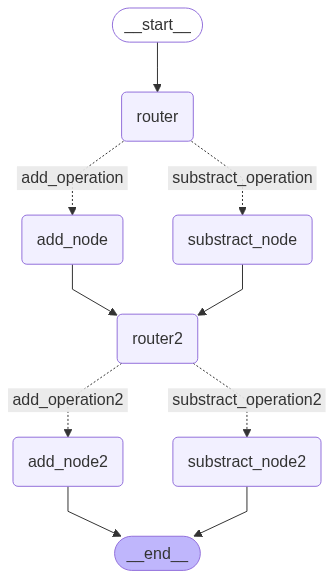

In [117]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [118]:
print(app.invoke({"number1":10, "operation":"-", "number2":5, "number3":7, "number4":2, "operation2":"+" }))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation': '-', 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
